In [2]:
import sys
import os
from pathlib import Path

import pickle
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

BASE_DIR_ = '..'
if BASE_DIR_ != sys.path[-1]:
    sys.path.append(BASE_DIR_)
from cbir import BASE_DIR
os.chdir(BASE_DIR)

In [3]:
now_parameters = '10k_10_4'

In [4]:
column_names = ['query', 'result', 'rank', 'similarity', 'sv', 'qe']
df = pd.read_csv(f'logs/{now_parameters}/answers.txt', header=None, names=column_names)

In [5]:
df.head()

,query,result,rank,similarity,sv,qe
0,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,1,0,False,False
1,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,2,0,False,False
2,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,3,0,False,False
3,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/distractor/...,4,0,False,False
4,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/distractor/...,5,0,False,False


In [6]:
query_names = df['query'].unique().tolist()

In [7]:
# query_name = query_names[0]

In [8]:
# df.loc[df['query'] == query_name, :]

In [9]:
# result_images = df.loc[df['query'] == query_name, 'result']

In [10]:
# result_images

In [12]:
queries = [
    'data/Buildings/Original/Oxford/jpg/all_souls_000013.jpg',
    # ...
]
results = []
for query in queries:
    results += [[query] + df.loc[df['query'] == query, 'result'].tolist()]

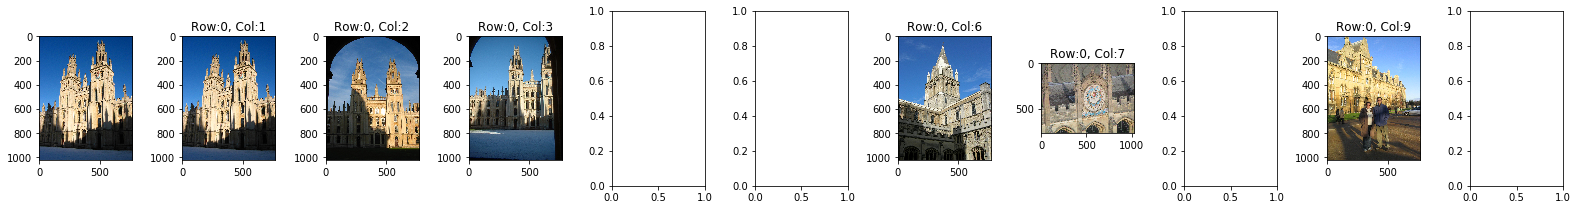

In [14]:
topk = 10
queries_count = len(queries)

nrows, ncols = queries_count, topk + 1
figsize = [ncols * 2, nrows * 3]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)

for i in range(nrows):
    query = results[i][0]
    img = Image.open(query)
    ax[i, 0].imshow(img)
    
    for j in range(1, topk + 1):
        try:
            img = Image.open(results[i][j])
            ax[i, j].imshow(img)
            rowid = i
            colid = j
            ax[i, j].set_title("Row:"+str(rowid)+", Col:"+str(colid))
        except FileNotFoundError:
            pass


plt.tight_layout(True)
plt.show()